In [1]:
import xarray as xr
import numpy as np
import glob
import metpy.calc as mpcalc
from metpy.units import units
import climtas.nci
from dask.diagnostics import ProgressBar


In [2]:
from barra_process import *

In [3]:
ProgressBar().register()
climtas.nci.GadiClient()

Client Scheduler: tcp://127.0.0.1:45961 Dashboard: /proxy/8787/status,Cluster Workers: 24 Cores: 24 Memory: 137.44 GB


In [4]:
#Vegetation (surf_type_frac)
#mean_var("surf_type_frac", "static", "")

#Sensible heat flux (av_sens_hflx)
#mean_var("av_sens_hflx", "forecast", "slv")

#Wind speed (from uwnd10m, vwnd10m)
mean_wind_speed()

#RH (from dewpt_scrn, temp_scrn)
mean_rh()

Loading uwnd10m...


distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting

KeyboardInterrupt: 

<xarray.DataArray 'surf_type_frac' (pseudo_level: 9, latitude: 691, longitude: 886)>
[5510034 values with dtype=float64]
Coordinates:
  * pseudo_level  (pseudo_level) int64 1 2 3 4 5 6 7 8 9
  * latitude      (latitude) float32 -44.5 -44.45 -44.4 ... -10.1 -10.05 -10.0
  * longitude     (longitude) float32 112.0 112.1 112.1 ... 156.1 156.2 156.2
Attributes:
    um_stash_source:         m01s00i216
    grid_mapping:            latitude_longitude
    long_name:               FRACTIONS OF SURFACE TYPES
    stash_code:              216
    wgdos_packing_accuracy:  None
    units:                   1
    MD5:                     31a25eeef1bde8ace7d78110119fa94d
    surf_classes:            1=broadleaf_trees;2=needleleaf_trees;3=c3;4=c4;5...


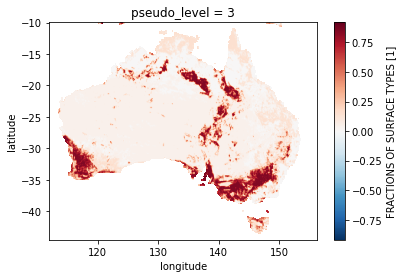

In [13]:
print(xr.open_dataset("/g/data/eg3/ab4502/ml_sprint/surf_type_frac_barra_awap.nc")["surf_type_frac"])
xr.open_dataset("/g/data/eg3/ab4502/ml_sprint/surf_type_frac_barra_awap.nc")["surf_type_frac"].sel({"pseudo_level":3}).plot()

<xarray.DataArray 'av_sens_hflx' (time: 4, latitude: 691, longitude: 886)>
[2448904 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-31 2000-02-29 2000-11-30 2000-12-31
  * latitude   (latitude) float32 -44.5 -44.45 -44.4 ... -10.1 -10.05 -10.0
  * longitude  (longitude) float32 112.0 112.1 112.1 112.2 ... 156.1 156.2 156.2


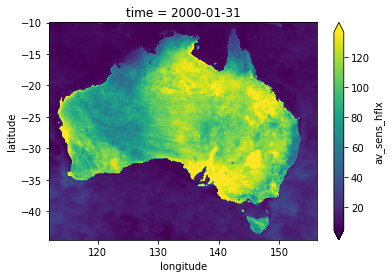

In [18]:
print(xr.open_dataset("/g/data/eg3/ab4502/ml_sprint/av_sens_hflx_barra_monthly_mean_awap.nc")["av_sens_hflx"])
xr.open_dataset("/g/data/eg3/ab4502/ml_sprint/av_sens_hflx_barra_monthly_mean_awap.nc")["av_sens_hflx"].isel({"time":0}).plot(robust=True)

<xarray.DataArray 'wind_speed' (time: 4, latitude: 691, longitude: 886)>
[2448904 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-31 2000-02-29 2000-11-30 2000-12-31
    height     float64 ...
  * latitude   (latitude) float32 -44.5 -44.45 -44.4 ... -10.1 -10.05 -10.0
  * longitude  (longitude) float32 112.0 112.1 112.1 112.2 ... 156.1 156.2 156.2
Attributes:
    units:      m/s
    time_step:  hourly_instantaneous
    height:     10 m


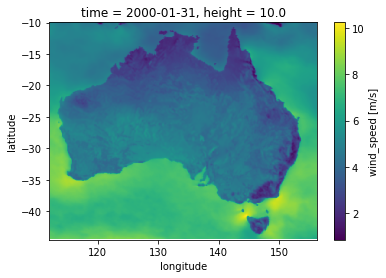

In [20]:
print(xr.open_dataset("/g/data/eg3/ab4502/ml_sprint/wind_speed_barra_monthly_mean_awap.nc")["wind_speed"])
xr.open_dataset("/g/data/eg3/ab4502/ml_sprint/wind_speed_barra_monthly_mean_awap.nc")["wind_speed"].isel({"time":0}).plot()

<xarray.DataArray 'relhum' (time: 4, latitude: 691, longitude: 886)>
[2448904 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2000-01-31 2000-02-29 2000-11-30 2000-12-31
    height     float64 ...
  * latitude   (latitude) float32 -44.5 -44.45 -44.4 ... -10.1 -10.05 -10.0
  * longitude  (longitude) float32 112.0 112.1 112.1 112.2 ... 156.1 156.2 156.2
Attributes:
    units:      %
    time_step:  hourly_instantaneous
    height:     1.5 m


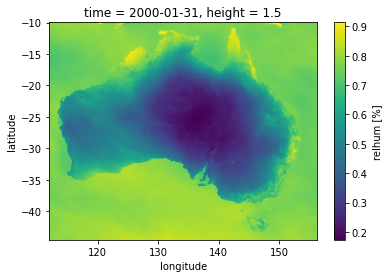

In [24]:
print(xr.open_dataset("/g/data/eg3/ab4502/ml_sprint/relhum_barra_monthly_mean_awap.nc")["relhum"])

(xr.open_dataset("/g/data/eg3/ab4502/ml_sprint/relhum_barra_monthly_mean_awap.nc")["relhum"]).isel({"time":0}).plot()

In [28]:
        airtemp = load_var("temp_scrn", "forecast", "spec")
        dewpoint = load_var("dewpt_scrn", "forecast", "slv")
        if not np.array_equal(airtemp.time, dewpoint.time):
                raise AssertionError("dewpoint and airtemp data have unequal time dimension")
        rh = mpcalc.relative_humidity_from_dewpoint(airtemp.metpy.quantify(), dewpoint.metpy.quantify()).compute().resample({"time":"1M"}).mean()

Loading temp_scrn...
Loading dewpt_scrn...


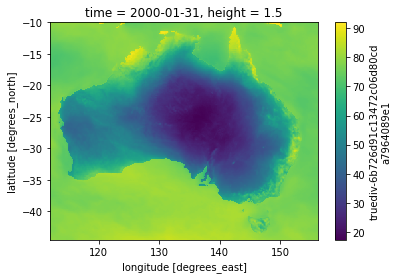

In [35]:
rh.metpy.convert_units(units["%"]).isel({"time":0}).plot()